In [1]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import model_from_json

In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28821 images belonging to 7 classes.


In [4]:
# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        'data/validation',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7066 images belonging to 7 classes.


In [5]:
# create CNN model 
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

In [8]:
model_info =model.fit(
        train_generator,
        steps_per_epoch=train_generator.n//train_generator.batch_size,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=validation_generator.n//validation_generator.batch_size)

Epoch 1/25
450/450 [==============================] - 485s 1s/step - loss: 1.8059 - accuracy: 0.2556 - val_loss: 1.7292 - val_accuracy: 0.3381
Epoch 2/25
450/450 [==============================] - 268s 596ms/step - loss: 1.6354 - accuracy: 0.3635 - val_loss: 1.5680 - val_accuracy: 0.4048
Epoch 3/25
450/450 [==============================] - 208s 463ms/step - loss: 1.5383 - accuracy: 0.4057 - val_loss: 1.4760 - val_accuracy: 0.4308
Epoch 4/25
450/450 [==============================] - 263s 584ms/step - loss: 1.4741 - accuracy: 0.4338 - val_loss: 1.4253 - val_accuracy: 0.4548
Epoch 5/25
450/450 [==============================] - 214s 474ms/step - loss: 1.4198 - accuracy: 0.4542 - val_loss: 1.3767 - val_accuracy: 0.4822
Epoch 6/25
450/450 [==============================] - 221s 491ms/step - loss: 1.3679 - accuracy: 0.4784 - val_loss: 1.3347 - val_accuracy: 0.4986
Epoch 7/25
450/450 [==============================] - 256s 569ms/step - loss: 1.3237 - accuracy: 0.4947 - val_loss: 1.2922 - va

In [9]:
import matplotlib.pyplot as plt 

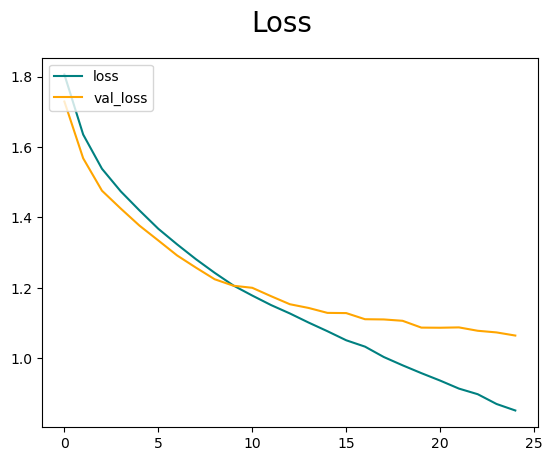

In [10]:
fig = plt.figure()
plt.plot(model_info.history['loss'], color='teal', label='loss')
plt.plot(model_info.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

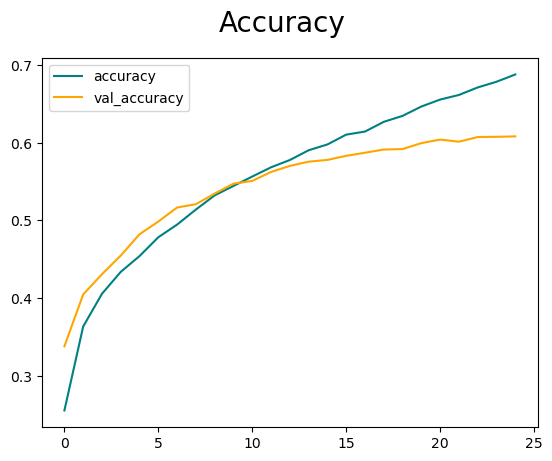

In [11]:
fig = plt.figure()
plt.plot(model_info.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_info.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show

In [12]:
# save model as json file
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [13]:
# save trained model weight in .h5 file
model.save_weights('emotional_model.h5')

# testing model

In [14]:
code = {'angry' : 0 , 'disgust' : 1, 'fear' : 2 , 'happy' : 3 ,'neutral' : 4 ,'sad' : 5 ,'surprise' : 6 }

In [15]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [16]:
# load weights into new model
emotion_model.load_weights("emotional_model.h5")

In [17]:
 #start the webcam feed
cap = cv2.VideoCapture(0)
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y-10)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'face_classifier' is not defined

In [ ]:
face_classifier = cv2.CascadeClassifier(r'haarcascades/haarcascade_frontalface_default.xml')
classifier = open('model.json', 'r')
loaded_model_json = classifier.read()
classifier.close()
emotion_model = model_from_json(loaded_model_json)


emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)


while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y-10)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
